## Logistic regression, model on customer churn binary classification

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [172]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [173]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


#### Data cleaning

In [174]:
# Checking the data types to see if they are correct.

churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [175]:
# I should change the data for column TotalCharges, object to float.

churnData["TotalCharges"] =  pd.to_numeric(churnData["TotalCharges"], errors='coerce')

In [176]:
# Checking if there are missing values in the dataframe.

churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [177]:
# I will replace the missing values.

TotalChargesMean = round(churnData["TotalCharges"].mean(), 4)

churnData["TotalCharges"] = churnData["TotalCharges"].fillna(TotalChargesMean)

In [178]:
# The target variable is churn. I will replace the current values to No-->0 and Yes-->1.

churnData["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [179]:
churnData["Churn"] = churnData["Churn"].replace(["No"],"0")
churnData["Churn"] = churnData["Churn"].replace(["Yes"],"1")
churnData["Churn"] =  pd.to_numeric(churnData["Churn"], errors='coerce')

In [180]:
churnData["Churn"].unique()

array([0, 1])

#### Scaling and modeling

In [181]:
# Taking the columns I will use in scaling and x/y splitting.

scalingData = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges", "Churn"]]

In [182]:
scalingData

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
7038,24,0,84.80,1990.50,0
7039,72,0,103.20,7362.90,0
7040,11,0,29.60,346.45,0
7041,4,1,74.40,306.60,1


In [183]:
# X/y splitting

X = scalingData.drop("Churn", axis = 1)


In [184]:
y = scalingData["Churn"]

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [186]:
# I will use standardscaler for the data. 
# I will fit it using train set and then apply this fit to both, train set and test set.

std_scaler = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

#### Logistic regression

,Error_metric,Train,Test
0,Accuracy,0.794462,0.780696
1,Precision,0.655240,0.661597
2,Recall,0.453559,0.441624


Confusion matrix for the train set
[[3807  352]
 [ 806  669]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


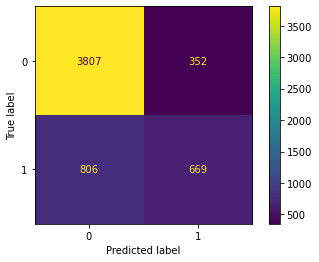



Confusion matrix for the test set
[[926  89]
 [220 174]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


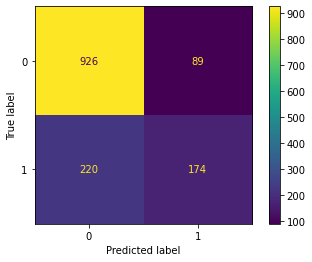

In [164]:
log_model = LogisticRegression() 
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

In [165]:
# From the model metrics: 

# Accuracy is pretty good. 79% of the data is correctly predicted.
# Precision is 65%. 65% of all of the predicted positive records were really positive. Not so good result.
# Recall is 45%. 45% of all the really positive records were predicted to be positive. Quite bad result.

#### KNN model

,Error_metric,Train,Test
0,Accuracy,0.835108,0.775727
1,Precision,0.727880,0.617470
2,Recall,0.591186,0.520305


Confusion matrix for the train set
[[3833  326]
 [ 603  872]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


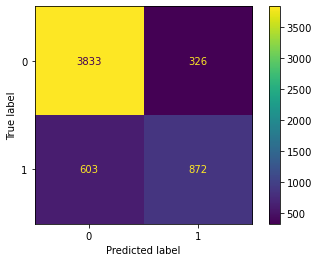



Confusion matrix for the test set
[[888 127]
 [189 205]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


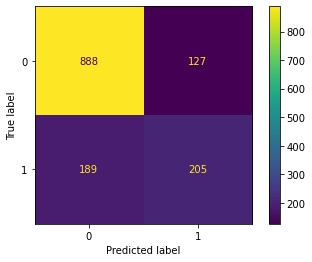

In [166]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_train_log = knn_model.predict(X_train_scaled)
y_pred_test_log = knn_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(knn_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(knn_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

In [167]:
# Another way of computing.

# from sklearn.metrics import classification_report

In [168]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

#### Decision tree

,Error_metric,Train,Test
0,Accuracy,0.790735,0.773598
1,Precision,0.667800,0.665198
2,Recall,0.399322,0.383249


Confusion matrix for the train set
[[3866  886]
 [ 293  589]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


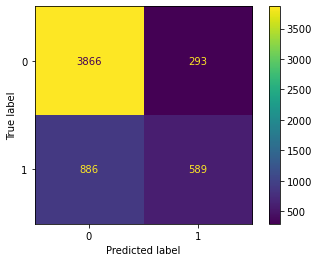



Confusion matrix for the test set
[[939 243]
 [ 76 151]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


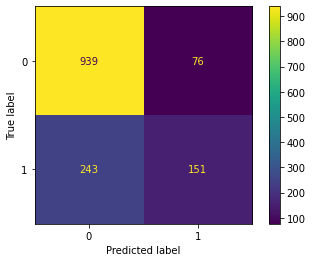

In [169]:
dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

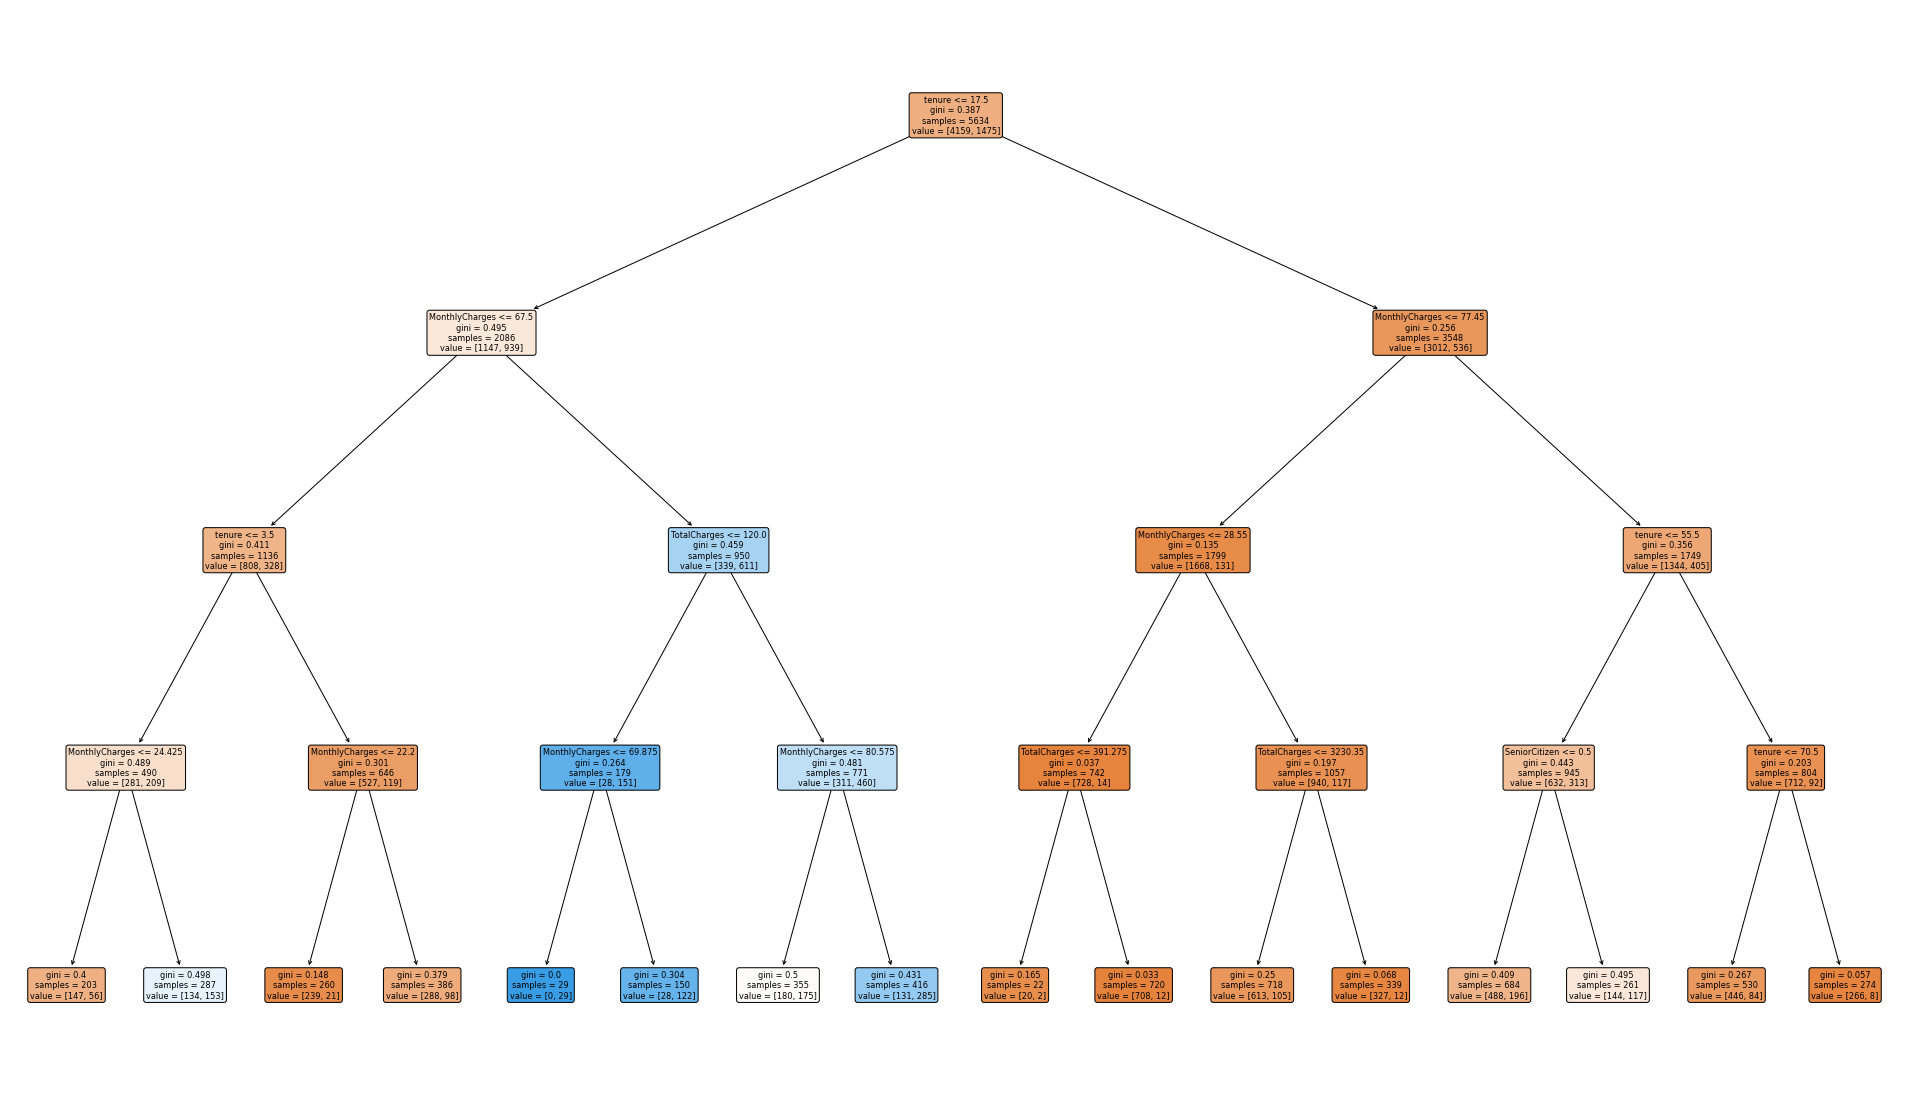

In [170]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

#### Trying the same models, with only categorical variables.

In [48]:
categChurnData = churnData.select_dtypes("object")

In [49]:
categChurnData_dummies = pd.get_dummies(categChurnData, drop_first=True)
categChurnData_dummies

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

,Error_metric,Train,Test
0,Accuracy,0.792332,0.789212
1,Precision,0.649657,0.681648
2,Recall,0.448814,0.461929


Confusion matrix for the train set
[[3802  357]
 [ 813  662]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


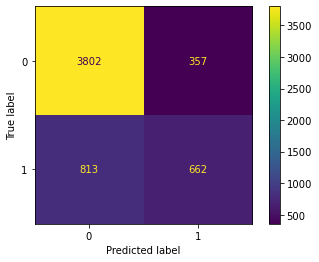



Confusion matrix for the test set
[[930  85]
 [212 182]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


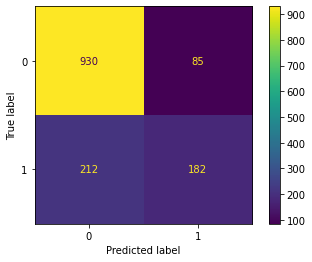

In [18]:
# Logistic regression

log_model = LogisticRegression() 
log_model.fit(X_train, y_train)
y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test,y_test, values_format = 'd')
plt.show()

,Error_metric,Train,Test
0,Accuracy,0.831203,0.755855
1,Precision,0.731449,0.582781
2,Recall,0.561356,0.446701


Confusion matrix for the train set
[[3855  304]
 [ 647  828]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


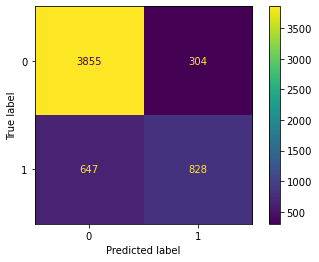



Confusion matrix for the test set
[[889 126]
 [218 176]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


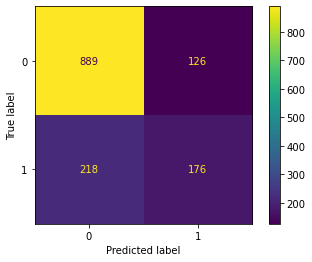

In [19]:
# KNN

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_train_log = knn_model.predict(X_train)
y_pred_test_log = knn_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(knn_model,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(knn_model,X_test,y_test, values_format = 'd')
plt.show()

,Error_metric,Train,Test
0,Accuracy,0.790735,0.773598
1,Precision,0.667800,0.665198
2,Recall,0.399322,0.383249


Confusion matrix for the train set
[[3866  886]
 [ 293  589]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


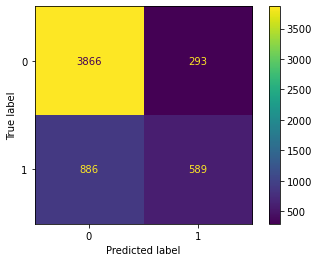



Confusion matrix for the test set
[[939 243]
 [ 76 151]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


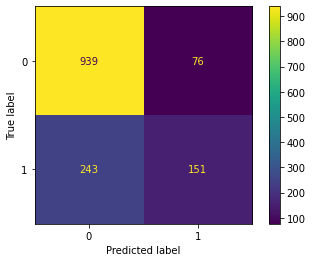

In [20]:
# Decision tree

dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

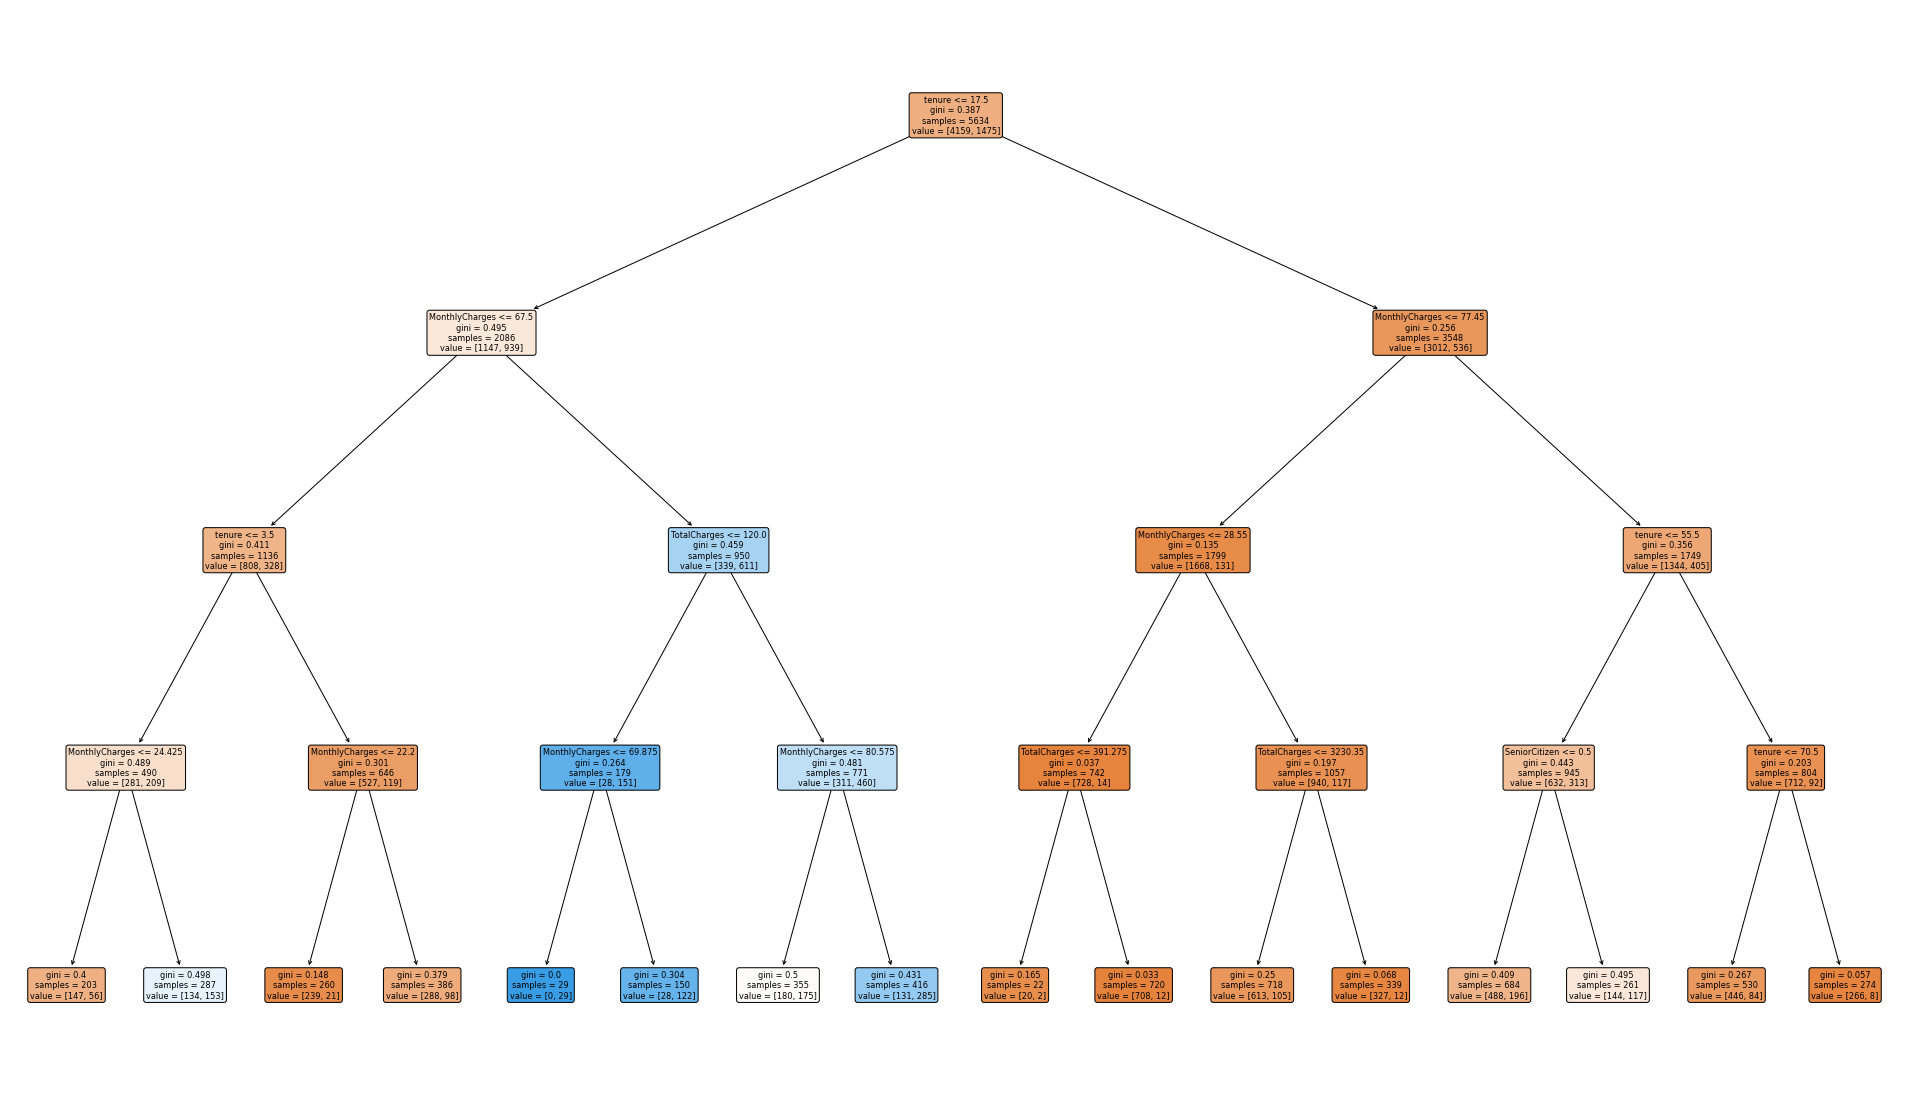

In [21]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

#### Trying the models again, using numerical and categorical features together.

In [188]:
X = pd.concat([X,categChurnData_dummies],axis=1)
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,1,0,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,0,56.95,1889.50,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,2,0,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,45,0,42.30,1840.75,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,2,0,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,0,1,0,1,1,0
7039,72,0,103.20,7362.90,0,1,1,1,0,0,...,0,1,0,0,0,1,0,1,1,0
7040,11,0,29.60,346.45,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,4,1,74.40,306.60,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [118]:
std_scaler = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.799787,0.809084
1,Precision,0.643034,0.697161
2,Recall,0.528814,0.560914


Confusion matrix for the train set
[[3726  433]
 [ 695  780]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


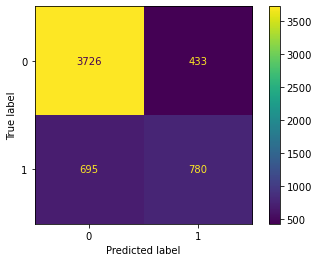



Confusion matrix for the test set
[[919  96]
 [173 221]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


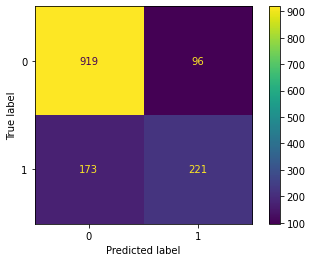

In [119]:
# Logistic regression

log_model = LogisticRegression() 
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

,Error_metric,Train,Test
0,Accuracy,0.832801,0.771469
1,Precision,0.715789,0.611801
2,Recall,0.599322,0.500000


Confusion matrix for the train set
[[3808  351]
 [ 591  884]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


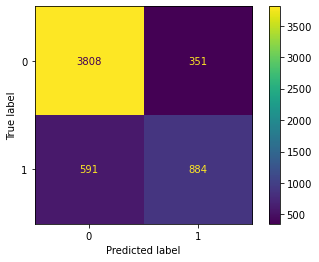



Confusion matrix for the test set
[[890 125]
 [197 197]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


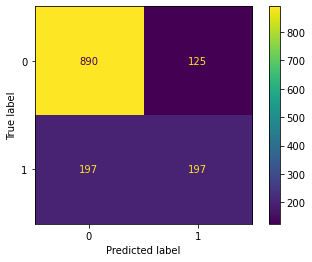

In [120]:
# KNN

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_train_log = knn_model.predict(X_train_scaled)
y_pred_test_log = knn_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(knn_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(knn_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.738197,0.720369
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000


Confusion matrix for the train set
[[4159 1475]
 [   0    0]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


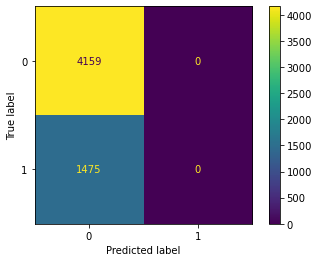

/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)




Confusion matrix for the test set
[[1015  394]
 [   0    0]]


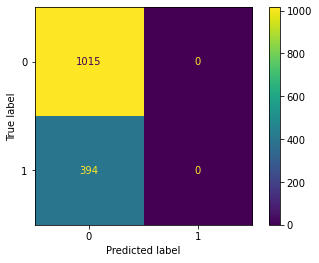

In [121]:
# Decision tree. Changing also max features and min sample to see how this affects my results.

dt = DecisionTreeClassifier(max_depth=4, max_features=3, min_samples_leaf=150)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

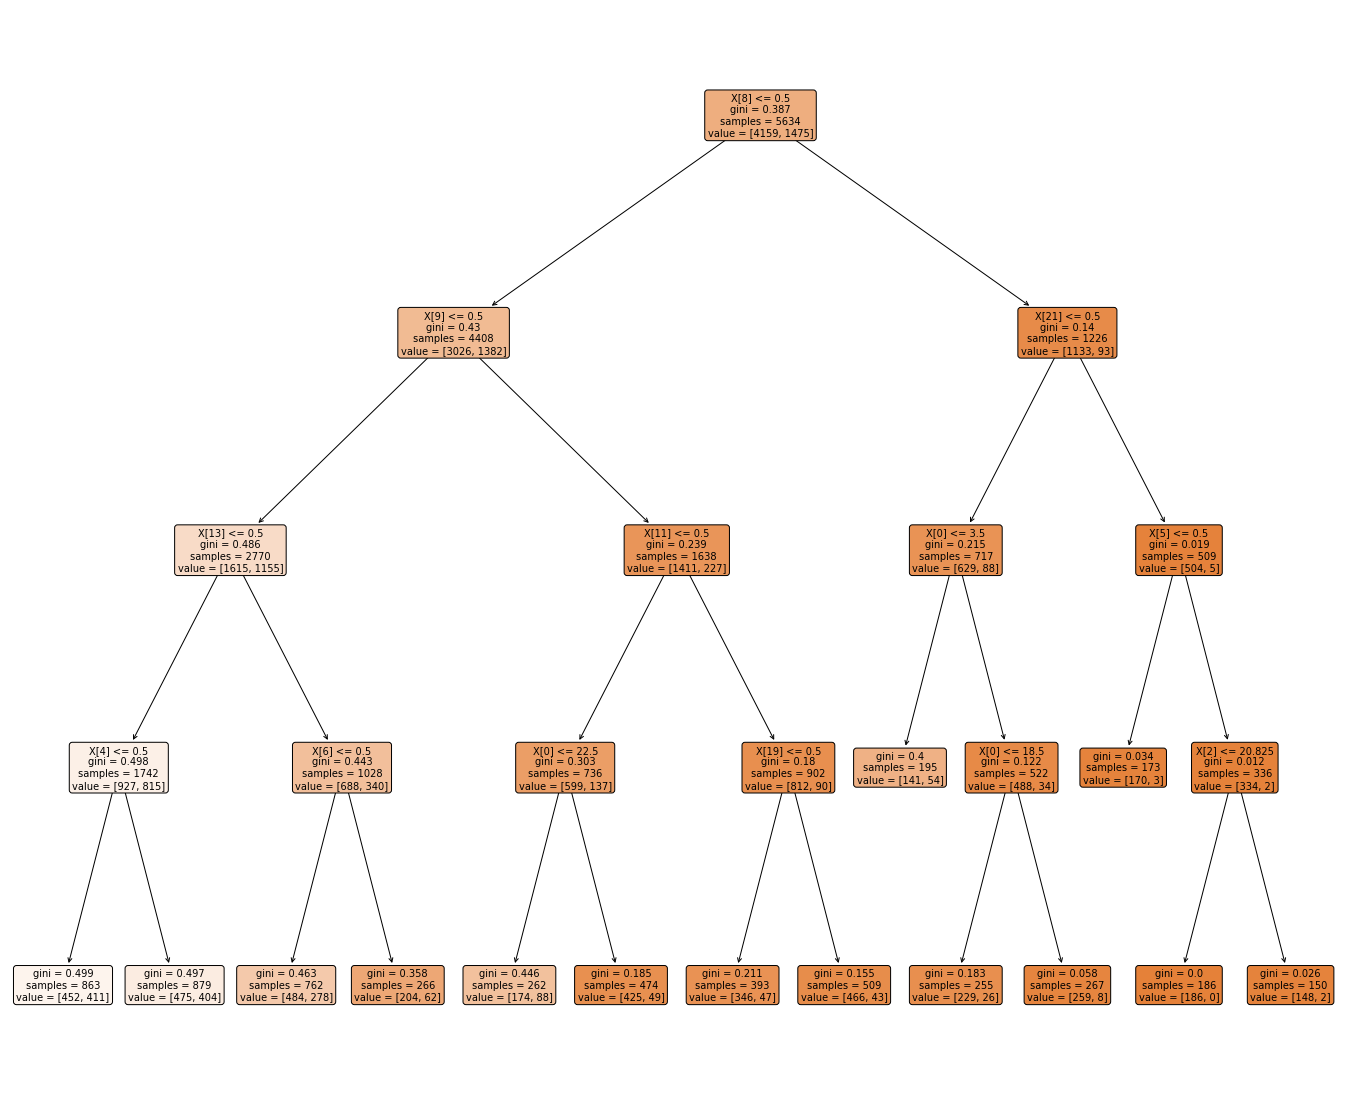

In [122]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (24,20))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

Feature: 0, Score: 0.09348
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00009
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00070
Feature: 5, Score: 0.00009
Feature: 6, Score: 0.01979
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.31330
Feature: 9, Score: 0.46128
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.01748
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.07028
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00158
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.02194


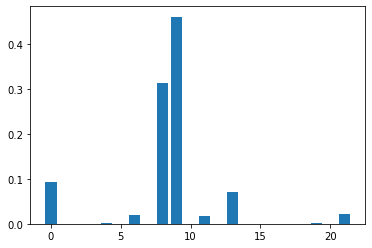

In [126]:
# Feature importance with CART, after decision tree.

# When you use enumerate(), the function gives you back two loop variables:
# The count of the current iteration
# The value of the item at the current iteration

importance = dt.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()


#### I will try model again, using only more important features. 0,2,8,9,20,21


In [221]:
selectedData = X[["tenure", "OnlineSecurity_No internet service", "OnlineSecurity_Yes", "MonthlyCharges", "Contract_One year", "Contract_Two year"]]

In [222]:
X_train, X_test, y_train, y_test = train_test_split(selectedData, y, test_size = 0.20, random_state = 123)

In [223]:
std_scaler = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.790557,0.777147
1,Precision,0.626176,0.630719
2,Recall,0.496271,0.489848


Confusion matrix for the train set
[[3722  437]
 [ 743  732]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


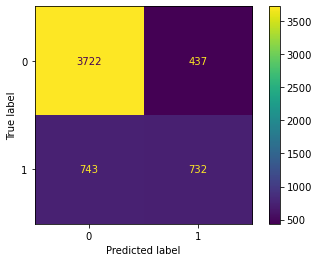



Confusion matrix for the test set
[[902 113]
 [201 193]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


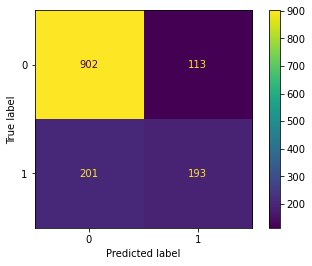

In [224]:
# Logistic regression

log_model = LogisticRegression() 
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

,Error_metric,Train,Test
0,Accuracy,0.837593,0.788502
1,Precision,0.728385,0.651899
2,Recall,0.605424,0.522843


Confusion matrix for the train set
[[3826  333]
 [ 582  893]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


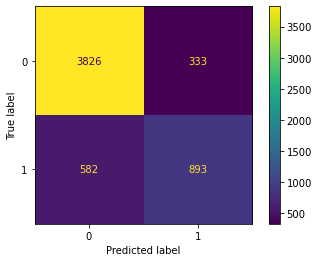



Confusion matrix for the test set
[[905 110]
 [188 206]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


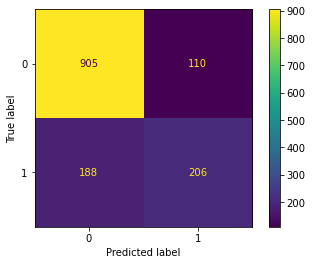

In [225]:
# KNN

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_train_log = knn_model.predict(X_train_scaled)
y_pred_test_log = knn_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(knn_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(knn_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

,Error_metric,Train,Test
0,Accuracy,0.797302,0.778566
1,Precision,0.641461,0.632258
2,Recall,0.511864,0.497462


Confusion matrix for the train set
[[3737  720]
 [ 422  755]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


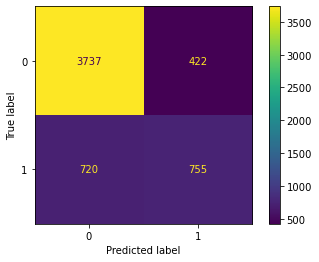



Confusion matrix for the test set
[[901 198]
 [114 196]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


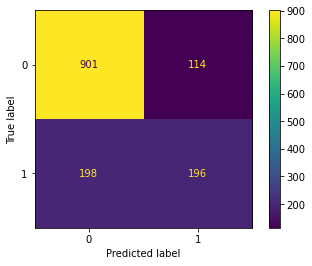

In [226]:
# Decision tree

dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

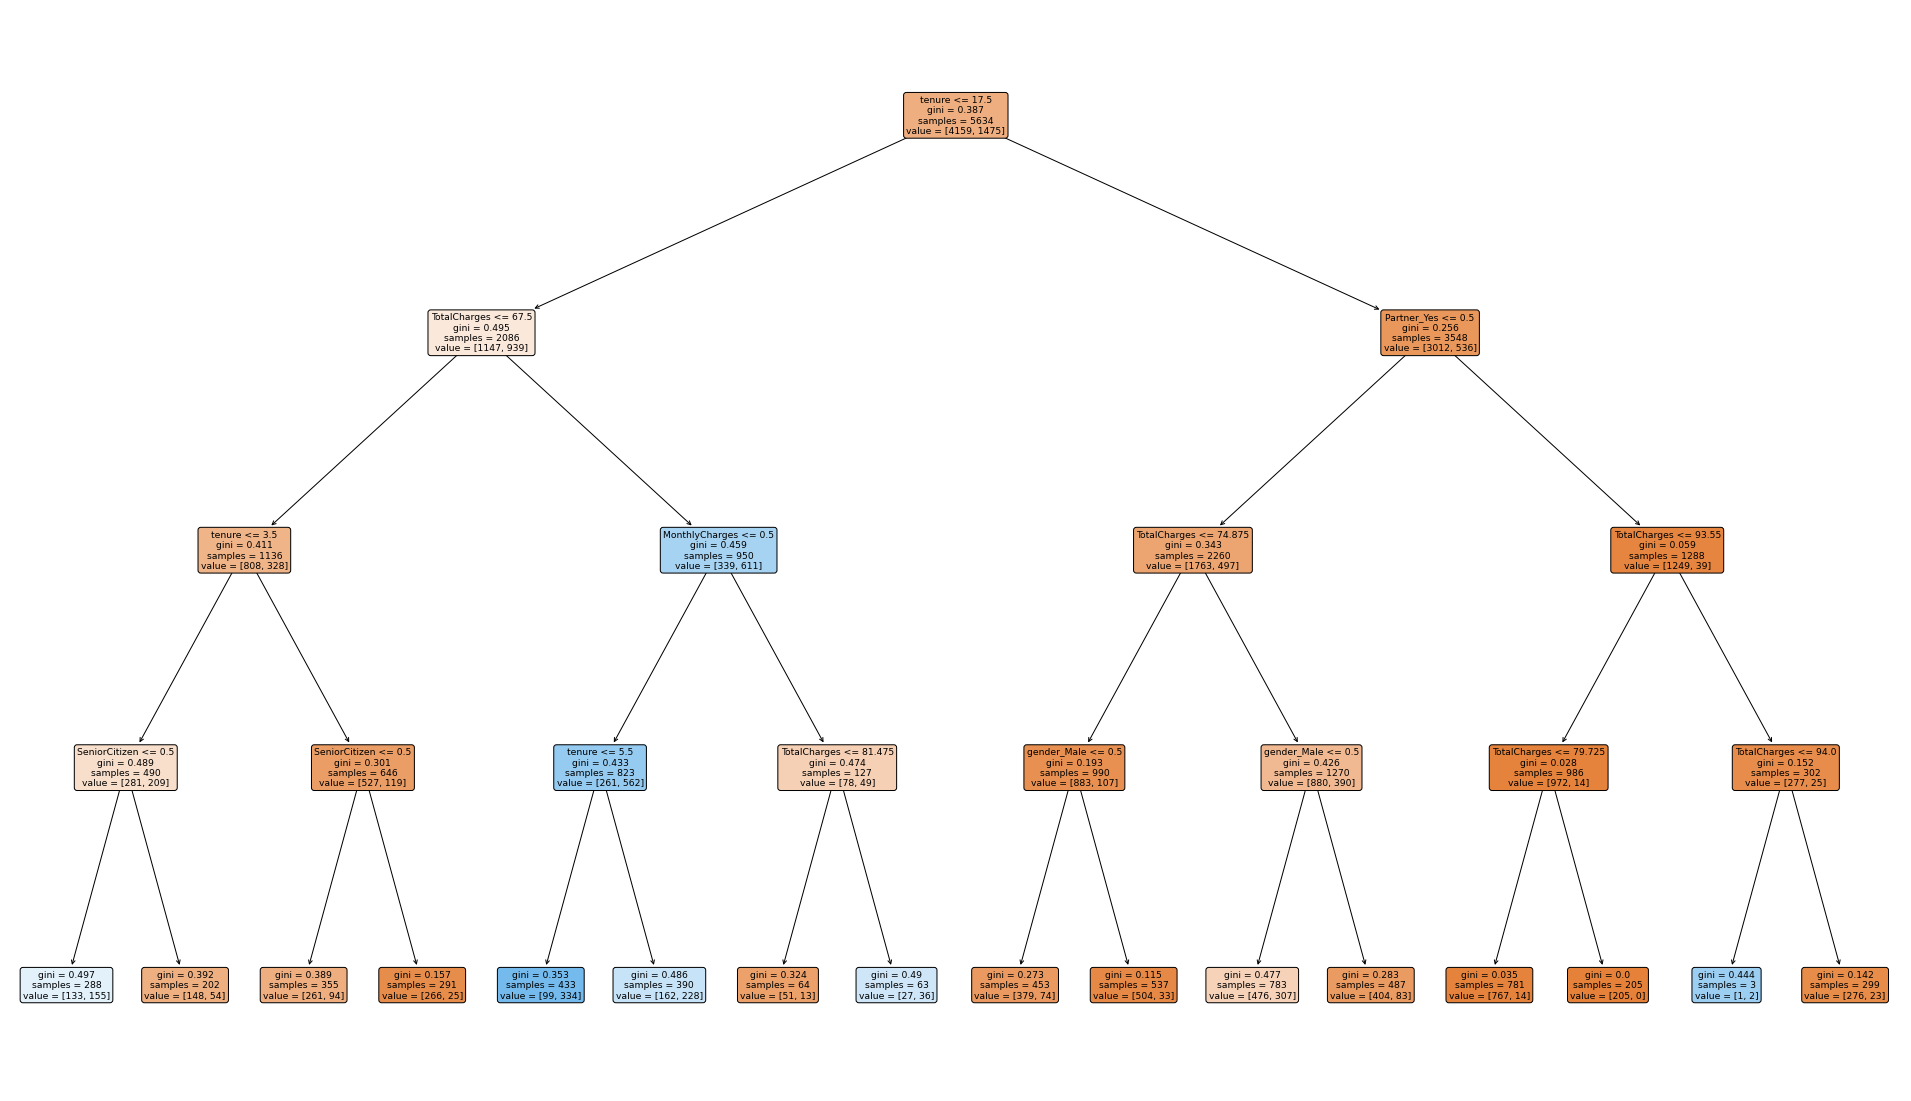

In [228]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show()

In [227]:
# The best model so far: KNN with only selected columns from the feature selection.

#### Cross validation, bias and variance handeling

In [127]:
# I will use cross validation for the decision tree model (made with numerical and categorical data)
# to evaluate the performance of the model.

In [128]:
set(y)

{0, 1}

In [129]:
scores=cross_val_score(dt, X_train, y_train, cv=5)
scores

array([0.76397516, 0.78527063, 0.73824312, 0.7515528 , 0.73801066])

In [130]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.76 accuracy with a standard deviation of 0.02


In [131]:
y_test

941     0
1404    0
5515    0
3684    0
7017    0
       ..
2464    1
5585    1
804     1
3190    0
3266    0
Name: Churn, Length: 1409, dtype: int64

In [132]:
y_pred = cross_val_predict(dt, X_test, y_test, cv=5)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [133]:
# I will compare different models to see, which one has the highest accuracy.

model1 = dt

model2 = log_model

model3 = knn_model


model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

{'Decision Tree': 0.7545294648865801, 'Logistic Regression': 0.7939309788321847, 'KNN': 0.7662421335821378}


In [134]:
# Logistic regression model has the best accuracy (0.794) after using cross validation. Before it was 0.799.

In [135]:
#### What should I conclude or how to continue?

In [136]:
# I will check the imbalance of the target variable.

y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [137]:
5174/len(y)

0.7346301292063041

In [138]:
# The data is imbalaced, so I will use different methods to deal with this and see the differences.

#### Downsampling

In [139]:
X = pd.concat([X, y], axis = 1)
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn
0,1,0,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,0,56.95,1889.50,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,2,0,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,45,0,42.30,1840.75,1,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
4,2,0,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,0,1,0,1,1,0,0
7039,72,0,103.20,7362.90,0,1,1,1,0,0,...,1,0,0,0,1,0,1,1,0,0
7040,11,0,29.60,346.45,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,4,1,74.40,306.60,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [140]:
category_0 = X[X["Churn"] == 0]
category_1 = X[X["Churn"] == 1]

In [141]:
category_1.shape

(1869, 23)

In [142]:
category_0.shape

(5174, 23)

In [143]:
category_0_down = category_0.sample(len(category_1,))

In [144]:
X = pd.concat([category_0_down, category_1], axis=0)

X = X.sample(frac=1)
X["Churn"].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [145]:
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn
3240,54,0,106.55,5763.30,0,1,0,1,0,1,...,0,0,0,0,1,0,1,1,0,1
275,5,0,85.40,401.10,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3050,5,0,85.40,425.90,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
3132,1,0,74.30,74.30,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6578,10,0,73.55,693.30,0,0,1,1,0,1,...,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,1,0,71.65,71.65,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3906,1,0,78.80,78.80,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2493,6,0,90.75,512.25,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2307,9,0,65.60,593.30,0,1,1,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [146]:
# I have a downsampled data. I will run the logistic regression model again.

In [147]:
X_down = X.drop("Churn", axis = 1)

In [148]:
y_down = X["Churn"]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, test_size = 0.20, random_state = 123)

In [151]:
std_scaler = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.774916,0.743316
1,Precision,0.756297,0.739899
2,Recall,0.807666,0.767016


Confusion matrix for the train set
[[1116  387]
 [ 286 1201]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


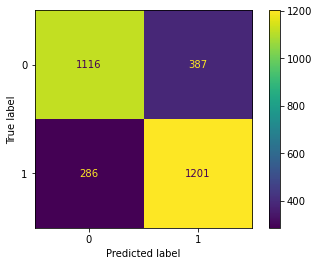



Confusion matrix for the test set
[[263 103]
 [ 89 293]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


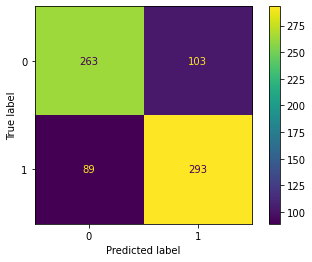

In [152]:
# Logistic regression

log_model = LogisticRegression() 
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

In [153]:
# The recall improved a lot: from 0.56 to 0.77 on test data.

#### Upsampling

In [155]:
#category_1
#category_0

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn
2,2,0,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2,0,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,8,0,99.65,820.50,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
8,28,0,104.80,3046.05,0,1,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
13,49,0,103.70,5036.30,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,12,0,59.80,727.80,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,1
7026,9,0,44.20,403.35,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7032,1,1,75.75,75.75,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7034,67,0,102.95,6886.25,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1


In [156]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 23)


In [157]:
category_1_up.shape

(5174, 23)

In [159]:
X = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
X = X.sample(frac=1)
X["Churn"].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [161]:
X_up = X.drop("Churn", axis = 1)

In [162]:
y_up = X["Churn"]

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size = 0.20, random_state = 123)

In [164]:
std_scaler = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.768181,0.770048
1,Precision,0.749327,0.750225
2,Recall,0.806662,0.806984


Confusion matrix for the train set
[[3017 1118]
 [ 801 3342]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


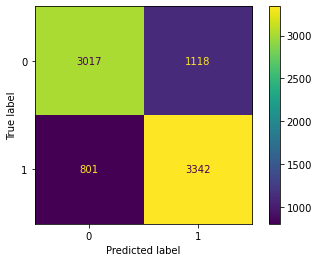



Confusion matrix for the test set
[[762 277]
 [199 832]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


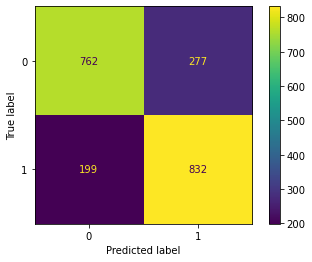

In [165]:
# Logistic regression

log_model = LogisticRegression() 
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

#### Upsampling with SMOTE

In [166]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [198]:
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,1,0,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,0,56.95,1889.50,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,2,0,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,45,0,42.30,1840.75,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,2,0,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,0,1,0,1,1,0
7039,72,0,103.20,7362.90,0,1,1,1,0,0,...,0,1,0,0,0,1,0,1,1,0
7040,11,0,29.60,346.45,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,4,1,74.40,306.60,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [200]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [202]:
std_scaler = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.799787,0.809084
1,Precision,0.643034,0.697161
2,Recall,0.528814,0.560914


Confusion matrix for the train set
[[3726  433]
 [ 695  780]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


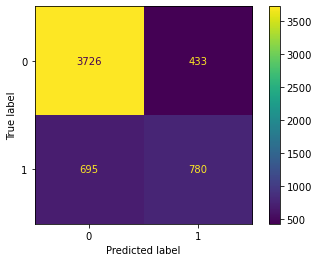



Confusion matrix for the test set
[[919  96]
 [173 221]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


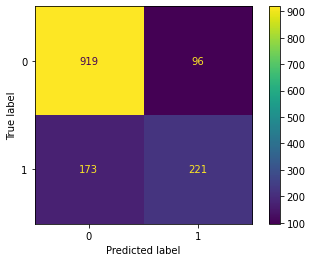

In [203]:
# Logistic regression

log_model = LogisticRegression() 
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

### Conclusions

#### The best model so far is with logistic regression, using numerical and categorical data, using upsampling. Cross validation with logistic regression: 0.79.

In [205]:
# Logistic regression (num+categ): Accuracy  0.80  0.81 
#                                  Precision 0.64  0.70
#                                  Recall    0.53  0.56

# LR with downsampling (num+cat):  Accuracy  0.77  0.74
#                                  Precision 0.76  0.74
#                                  Recall    0.81  0.77

# LR with upsampling (num+cat):    Accuracy  0.77  0.77
#                                  Precision 0.75  0.75
#                                  Recall    0.81  0.81

# LR with SMOTE (num+cat):         Accuracy  0.80  0.81
#                                  Precision 0.64  0.70
#                                  Recall    0.53  0.56